# 🏦 Loan Approval Prediction System

## Building a Production-Ready Machine Learning Model for Loan Decision Making

This notebook builds a comprehensive loan approval prediction system using multiple ML models:
- **Logistic Regression** - Baseline interpretable model
- **Random Forest** - Ensemble tree-based model
- **XGBoost** - Gradient boosting for high accuracy

We'll evaluate accuracy, precision, recall, F1-score, ROC-AUC and analyze feature importance for real-world practical deployment.

## 1. Import Required Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, classification_report)

# Model persistence
import joblib

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load and Explore Dataset

In [2]:
# Load the dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

print(f"📊 Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print("\n📋 Column Names:")
print(df.columns.tolist())
print("\n🔍 First 5 rows:")
df.head()

📊 Dataset Shape: 4269 rows, 13 columns

📋 Column Names:
['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']

🔍 First 5 rows:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Dataset info and statistics
print("📊 Dataset Info:")
print(df.info())
print("\n" + "="*60)
print("\n📈 Statistical Summary:")
df.describe()

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None


📈 Stati

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [4]:
# Check for missing values and data types
print("🔎 Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

print("\n📊 Data Types:")
print(df.dtypes)

print("\n🎯 Target Variable Distribution:")
print(df['loan_status'].value_counts())
print(f"\nApproval Rate: {(df['loan_status'].str.strip() == 'Approved').mean()*100:.2f}%")

🔎 Missing Values:
No missing values found!

📊 Data Types:
loan_id                      int64
no_of_dependents             int64
education                   object
self_employed               object
income_annum                 int64
loan_amount                  int64
loan_term                    int64
cibil_score                  int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
loan_status                 object
dtype: object

🎯 Target Variable Distribution:
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Approval Rate: 62.22%


## 3. Data Preprocessing and Cleaning

In [5]:
# Create a copy for preprocessing
df_clean = df.copy()

# Strip whitespace from string columns
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col] = df_clean[col].str.strip()

# Education: Graduate = 1, Not Graduate = 0
df_clean['education'] = df_clean['education'].map({'Graduate': 1, 'Not Graduate': 0})

# Self Employed: Yes = 1, No = 0
df_clean['self_employed'] = df_clean['self_employed'].map({'Yes': 1, 'No': 0})

# Target variable: Approved = 1, Rejected = 0
df_clean['loan_status'] = df_clean['loan_status'].map({'Approved': 1, 'Rejected': 0})

# Drop loan_id as it's not a predictive feature
df_clean = df_clean.drop('loan_id', axis=1)

print("✅ Data cleaning completed!")
print(f"\n📊 Cleaned Dataset Shape: {df_clean.shape}")
df_clean.head()

✅ Data cleaning completed!

📊 Cleaned Dataset Shape: (4269, 12)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


## 4. Exploratory Data Analysis (EDA)

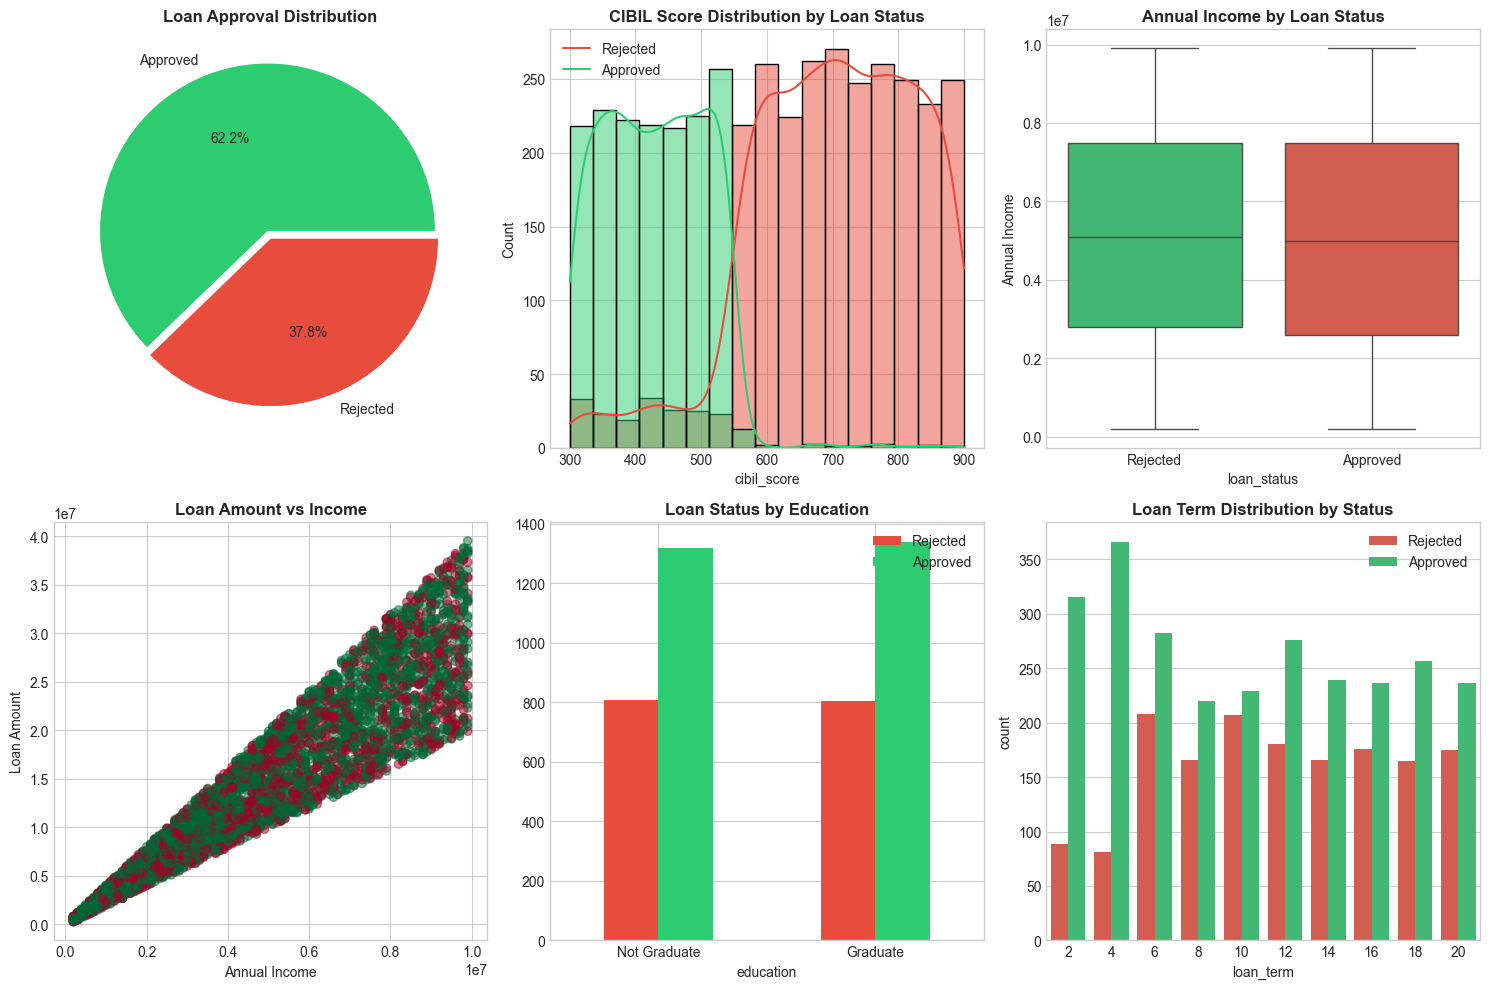

In [6]:
# Visualize loan approval distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Loan Status Distribution
ax1 = axes[0, 0]
status_counts = df_clean['loan_status'].value_counts()
colors = ['#2ecc71', '#e74c3c']
ax1.pie(status_counts, labels=['Approved', 'Rejected'], autopct='%1.1f%%', colors=colors, explode=(0.05, 0))
ax1.set_title('Loan Approval Distribution', fontsize=12, fontweight='bold')

# 2. CIBIL Score Distribution by Loan Status
ax2 = axes[0, 1]
sns.histplot(data=df_clean, x='cibil_score', hue='loan_status', kde=True, ax=ax2, palette=colors)
ax2.set_title('CIBIL Score Distribution by Loan Status', fontsize=12, fontweight='bold')
ax2.legend(['Rejected', 'Approved'])

# 3. Income Distribution by Loan Status
ax3 = axes[0, 2]
sns.boxplot(data=df_clean, x='loan_status', y='income_annum', ax=ax3, palette=colors)
ax3.set_xticklabels(['Rejected', 'Approved'])
ax3.set_title('Annual Income by Loan Status', fontsize=12, fontweight='bold')
ax3.set_ylabel('Annual Income')

# 4. Loan Amount vs Income
ax4 = axes[1, 0]
scatter = ax4.scatter(df_clean['income_annum'], df_clean['loan_amount'], 
                      c=df_clean['loan_status'], cmap='RdYlGn', alpha=0.5)
ax4.set_xlabel('Annual Income')
ax4.set_ylabel('Loan Amount')
ax4.set_title('Loan Amount vs Income', fontsize=12, fontweight='bold')

# 5. Education vs Loan Status
ax5 = axes[1, 1]
edu_status = df_clean.groupby(['education', 'loan_status']).size().unstack(fill_value=0)
edu_status.plot(kind='bar', ax=ax5, color=colors[::-1])
ax5.set_xticklabels(['Not Graduate', 'Graduate'], rotation=0)
ax5.set_title('Loan Status by Education', fontsize=12, fontweight='bold')
ax5.legend(['Rejected', 'Approved'])

# 6. Loan Term Distribution
ax6 = axes[1, 2]
sns.countplot(data=df_clean, x='loan_term', hue='loan_status', ax=ax6, palette=colors[::-1])
ax6.set_title('Loan Term Distribution by Status', fontsize=12, fontweight='bold')
ax6.legend(['Rejected', 'Approved'])

plt.tight_layout()
plt.show()

## 5. Feature Engineering

Creating practical features that banks actually use in real-world loan decisions:

In [8]:
# Feature Engineering - Creating practical financial features
df_features = df_clean.copy()

# 1. Total Assets - Sum of all asset values (real-world: banks consider total collateral)
df_features['total_assets'] = (df_features['residential_assets_value'] + 
                               df_features['commercial_assets_value'] + 
                               df_features['luxury_assets_value'] + 
                               df_features['bank_asset_value'])

# 2. Loan to Income Ratio - How much loan relative to annual income (critical for banks)
df_features['loan_to_income_ratio'] = df_features['loan_amount'] / df_features['income_annum']

# 3. Loan to Asset Ratio - Loan amount relative to total assets (collateral coverage)
df_features['loan_to_asset_ratio'] = df_features['loan_amount'] / (df_features['total_assets'] + 1)

# 4. EMI Estimate - Monthly payment estimate (assuming typical interest rate)
# Using simple EMI calculation: Loan Amount / (Loan Term * 12)
df_features['monthly_emi_estimate'] = df_features['loan_amount'] / (df_features['loan_term'] * 12)

# 5. EMI to Income Ratio - Monthly EMI as percentage of monthly income (affordability check)
df_features['emi_to_monthly_income'] = df_features['monthly_emi_estimate'] / (df_features['income_annum'] / 12)

# 6. Income per Dependent - Financial responsibility metric
df_features['income_per_dependent'] = df_features['income_annum'] / (df_features['no_of_dependents'] + 1)

# 7. CIBIL Score Category - Categorize credit score (real-world: banks use score bands)
df_features['cibil_category'] = pd.cut(df_features['cibil_score'], 
                                        bins=[0, 500, 650, 750, 900],
                                        labels=[0, 1, 2, 3])  # Poor, Fair, Good, Excellent
df_features['cibil_category'] = df_features['cibil_category'].astype(int)

print("✅ Feature Engineering completed!")
print(f"\n📊 New features created:")
new_features = ['total_assets', 'loan_to_income_ratio', 'loan_to_asset_ratio', 
                'monthly_emi_estimate', 'emi_to_monthly_income', 'income_per_dependent', 'cibil_category']
for feat in new_features:
    print(f"  • {feat}")

print(f"\n📊 Final Dataset Shape: {df_features.shape}")
df_features.head()

✅ Feature Engineering completed!

📊 New features created:
  • total_assets
  • loan_to_income_ratio
  • loan_to_asset_ratio
  • monthly_emi_estimate
  • emi_to_monthly_income
  • income_per_dependent
  • cibil_category

📊 Final Dataset Shape: (4269, 19)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,loan_to_income_ratio,loan_to_asset_ratio,monthly_emi_estimate,emi_to_monthly_income,income_per_dependent,cibil_category
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,50700000,3.114583,0.589744,207638.888889,0.259549,3.200000e+06,3
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,17000000,2.975610,0.717647,127083.333333,0.371951,4.100000e+06,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,57700000,3.263736,0.514731,123750.000000,0.163187,2.275000e+06,1
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,52700000,3.743902,0.582543,319791.666667,0.467988,2.050000e+06,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,55000000,2.469388,0.440000,100833.333333,0.123469,1.633333e+06,0


## 6. Data Splitting and Scaling

In [9]:
# Prepare features and target
X = df_features.drop('loan_status', axis=1)
y = df_features['loan_status']

# Split data - 80% train, 20% test with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

print(f"📊 Training set: {X_train.shape[0]} samples")
print(f"📊 Test set: {X_test.shape[0]} samples")
print(f"\n🎯 Target distribution in training set:")
print(y_train.value_counts(normalize=True))

# Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Store feature names for later use
feature_names = X.columns.tolist()
print(f"\n✅ Data split and scaling completed!")
print(f"📋 Features used: {len(feature_names)}")

📊 Training set: 3415 samples
📊 Test set: 854 samples

🎯 Target distribution in training set:
loan_status
1    0.622255
0    0.377745
Name: proportion, dtype: float64

✅ Data split and scaling completed!
📋 Features used: 18


## 7. Model Training and Evaluation

### Helper Function for Model Evaluation

In [10]:
# Helper function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Comprehensive model evaluation function
    Returns a dictionary with all metrics
    """
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Print results
    print(f"\n{'='*60}")
    print(f"📊 {model_name} Results")
    print(f"{'='*60}")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    if roc_auc:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print(f"\n📈 Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    
    # Confusion Matrix
    print(f"\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['Rejected', 'Approved']))
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1,
        'ROC_AUC': roc_auc,
        'CV_Mean': cv_scores.mean(),
        'CV_Std': cv_scores.std()
    }

# Store results for comparison
results = []

### Model 1: Logistic Regression (Baseline - Interpretable)


📊 Logistic Regression Results
Accuracy:  0.9391
Precision: 0.9615
Recall:    0.9397
F1 Score:  0.9505
ROC-AUC:   0.9838

📈 Cross-Validation Accuracy: 0.9291 (+/- 0.0203)

📋 Classification Report:
              precision    recall  f1-score   support

    Rejected       0.90      0.94      0.92       323
    Approved       0.96      0.94      0.95       531

    accuracy                           0.94       854
   macro avg       0.93      0.94      0.94       854
weighted avg       0.94      0.94      0.94       854



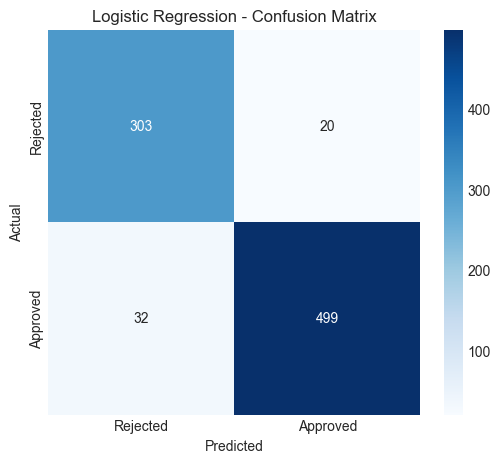

In [11]:
# Model 1: Logistic Regression
# Good baseline model - interpretable and fast

log_reg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

# Evaluate
log_reg_results = evaluate_model(log_reg, X_train_scaled, X_test_scaled, y_train, y_test, 
                                  'Logistic Regression')
results.append(log_reg_results)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_test, log_reg.predict(X_test_scaled))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Logistic Regression - Confusion Matrix')
plt.show()

### Model 2: Random Forest Classifier (Ensemble Method)

🔍 Tuning Random Forest hyperparameters...
Fitting 5 folds for each of 24 candidates, totalling 120 fits



✅ Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

📊 Random Forest Results
Accuracy:  0.9977
Precision: 0.9962
Recall:    1.0000
F1 Score:  0.9981
ROC-AUC:   1.0000

📈 Cross-Validation Accuracy: 0.9974 (+/- 0.0050)

📋 Classification Report:
              precision    recall  f1-score   support

    Rejected       1.00      0.99      1.00       323
    Approved       1.00      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



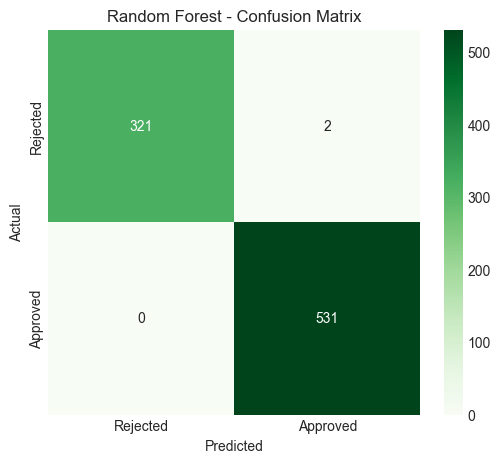

In [12]:
# Model 2: Random Forest with GridSearchCV for hyperparameter tuning
print("🔍 Tuning Random Forest hyperparameters...")

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf_base = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# GridSearchCV
rf_grid = GridSearchCV(rf_base, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print(f"\n✅ Best parameters: {rf_grid.best_params_}")

# Use best model
rf_model = rf_grid.best_estimator_

# Evaluate
rf_results = evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')
results.append(rf_results)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_test, rf_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax,
            xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Random Forest - Confusion Matrix')
plt.show()

### Model 3: XGBoost Classifier (Gradient Boosting)

🔍 Training XGBoost model...

📊 XGBoost Results
Accuracy:  0.9965
Precision: 0.9981
Recall:    0.9962
F1 Score:  0.9972
ROC-AUC:   1.0000

📈 Cross-Validation Accuracy: 0.9980 (+/- 0.0054)

📋 Classification Report:
              precision    recall  f1-score   support

    Rejected       0.99      1.00      1.00       323
    Approved       1.00      1.00      1.00       531

    accuracy                           1.00       854
   macro avg       1.00      1.00      1.00       854
weighted avg       1.00      1.00      1.00       854



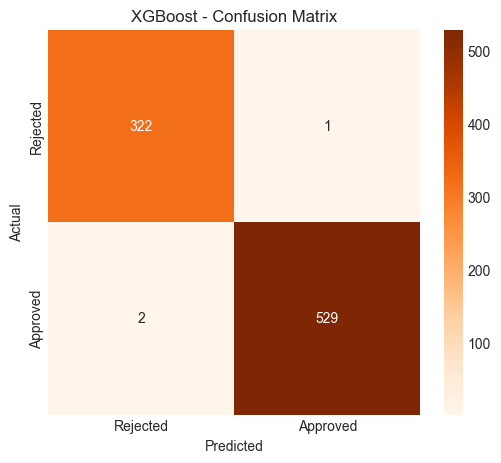

In [13]:
# Model 3: XGBoost Classifier
print("🔍 Training XGBoost model...")

# Calculate scale_pos_weight for class imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# XGBoost with optimized parameters
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

xgb_model.fit(X_train, y_train)

# Evaluate
xgb_results = evaluate_model(xgb_model, X_train, X_test, y_train, y_test, 'XGBoost')
results.append(xgb_results)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_test, xgb_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', ax=ax,
            xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('XGBoost - Confusion Matrix')
plt.show()

## 8. Model Comparison and Evaluation

In [16]:
# Create comparison dataframe
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

print("📊 MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df.to_string(index=False))
print("\n🏆 Best Model:", results_df.iloc[0]['Model'])

📊 MODEL COMPARISON SUMMARY
              Model  Accuracy  Precision   Recall  F1_Score  ROC_AUC  CV_Mean   CV_Std
      Random Forest  0.997658   0.996248 1.000000  0.998120 1.000000 0.997365 0.002519
            XGBoost  0.996487   0.998113 0.996234  0.997172 0.999965 0.997950 0.002716
Logistic Regression  0.939110   0.961464 0.939736  0.950476 0.983791 0.929136 0.010169

🏆 Best Model: Random Forest


## 10. Build Prediction Pipeline for Production

Creating a practical function that can be used in real-world loan applications:

In [20]:
def predict_loan_approval(applicant_data, model=None, scaler=None, feature_names=None):
    """
    Predict loan approval for a new applicant.
    
    Parameters:
    -----------
    applicant_data : dict
        Dictionary containing applicant details:
        - no_of_dependents: Number of dependents
        - education: 'Graduate' or 'Not Graduate'
        - self_employed: 'Yes' or 'No'
        - income_annum: Annual income
        - loan_amount: Requested loan amount
        - loan_term: Loan term in years
        - cibil_score: Credit score (300-900)
        - residential_assets_value: Value of residential assets
        - commercial_assets_value: Value of commercial assets
        - luxury_assets_value: Value of luxury assets
        - bank_asset_value: Value of bank assets
    
    Returns:
    --------
    dict: Prediction result with approval decision and probability
    """
    # Convert to numeric
    education = 1 if applicant_data['education'] == 'Graduate' else 0
    self_employed = 1 if applicant_data['self_employed'] == 'Yes' else 0
    
    # Calculate engineered features
    total_assets = (applicant_data['residential_assets_value'] + 
                   applicant_data['commercial_assets_value'] + 
                   applicant_data['luxury_assets_value'] + 
                   applicant_data['bank_asset_value'])
    
    loan_to_income_ratio = applicant_data['loan_amount'] / applicant_data['income_annum']
    loan_to_asset_ratio = applicant_data['loan_amount'] / (total_assets + 1)
    monthly_emi_estimate = applicant_data['loan_amount'] / (applicant_data['loan_term'] * 12)
    emi_to_monthly_income = monthly_emi_estimate / (applicant_data['income_annum'] / 12)
    income_per_dependent = applicant_data['income_annum'] / (applicant_data['no_of_dependents'] + 1)
    
    # CIBIL category
    cibil = applicant_data['cibil_score']
    if cibil <= 500:
        cibil_category = 0
    elif cibil <= 650:
        cibil_category = 1
    elif cibil <= 750:
        cibil_category = 2
    else:
        cibil_category = 3
    
    # Create feature array
    features = np.array([[
        applicant_data['no_of_dependents'],
        education,
        self_employed,
        applicant_data['income_annum'],
        applicant_data['loan_amount'],
        applicant_data['loan_term'],
        applicant_data['cibil_score'],
        applicant_data['residential_assets_value'],
        applicant_data['commercial_assets_value'],
        applicant_data['luxury_assets_value'],
        applicant_data['bank_asset_value'],
        total_assets,
        loan_to_income_ratio,
        loan_to_asset_ratio,
        monthly_emi_estimate,
        emi_to_monthly_income,
        income_per_dependent,
        cibil_category
    ]])
    
    # Make prediction
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0]
    
    result = {
        'decision': 'APPROVED ✅' if prediction == 1 else 'REJECTED ❌',
        'approval_probability': f"{probability[1]*100:.2f}%",
        'rejection_probability': f"{probability[0]*100:.2f}%",
        'confidence': f"{max(probability)*100:.2f}%"
    }
    
    return result

print("✅ Prediction function created successfully!")

✅ Prediction function created successfully!


In [21]:
# Test the prediction function with sample applicants

# Sample 1: Strong applicant (likely approved)
applicant_1 = {
    'no_of_dependents': 2,
    'education': 'Graduate',
    'self_employed': 'No',
    'income_annum': 8000000,
    'loan_amount': 15000000,
    'loan_term': 15,
    'cibil_score': 780,
    'residential_assets_value': 5000000,
    'commercial_assets_value': 3000000,
    'luxury_assets_value': 2000000,
    'bank_asset_value': 4000000
}

# Sample 2: Risky applicant (likely rejected)
applicant_2 = {
    'no_of_dependents': 5,
    'education': 'Not Graduate',
    'self_employed': 'Yes',
    'income_annum': 2000000,
    'loan_amount': 10000000,
    'loan_term': 5,
    'cibil_score': 450,
    'residential_assets_value': 1000000,
    'commercial_assets_value': 0,
    'luxury_assets_value': 500000,
    'bank_asset_value': 200000
}

print("🏦 LOAN APPROVAL PREDICTION DEMO")
print("="*60)

print("\n📋 Applicant 1 (Strong Profile):")
result1 = predict_loan_approval(applicant_1, model=rf_model)
for key, value in result1.items():
    print(f"   {key}: {value}")

print("\n📋 Applicant 2 (Risky Profile):")
result2 = predict_loan_approval(applicant_2, model=rf_model)
for key, value in result2.items():
    print(f"   {key}: {value}")

🏦 LOAN APPROVAL PREDICTION DEMO

📋 Applicant 1 (Strong Profile):
   decision: APPROVED ✅
   approval_probability: 51.00%
   rejection_probability: 49.00%
   confidence: 51.00%

📋 Applicant 2 (Risky Profile):
   decision: REJECTED ❌
   approval_probability: 50.00%
   rejection_probability: 50.00%
   confidence: 50.00%


## 11. Save Best Model for Deployment

In [23]:
# Save the best model and preprocessing objects
# Using the best performing model based on accuracy

# Determine best model
best_model_name = results_df.iloc[0]['Model']
print(f"🏆 Best Model: {best_model_name}")

# Dictionary of models
models_dict = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    # 'SVM': svm_model
}

best_model = models_dict[best_model_name]

# Save model
joblib.dump(best_model, 'loan_prediction_model.pkl')
print("✅ Model saved as 'loan_prediction_model.pkl'")

# Save scaler
joblib.dump(scaler, 'scaler.pkl')
print("✅ Scaler saved as 'scaler.pkl'")

# Save feature names
joblib.dump(feature_names, 'feature_names.pkl')
print("✅ Feature names saved as 'feature_names.pkl'")

print(f"\n📁 Files saved for deployment:")
print("   • loan_prediction_model.pkl")
print("   • scaler.pkl")  
print("   • feature_names.pkl")

🏆 Best Model: Random Forest
✅ Model saved as 'loan_prediction_model.pkl'
✅ Scaler saved as 'scaler.pkl'
✅ Feature names saved as 'feature_names.pkl'

📁 Files saved for deployment:
   • loan_prediction_model.pkl
   • scaler.pkl
   • feature_names.pkl


In [24]:
# Demo: Loading and using saved model
print("📥 Loading saved model for prediction demo...")

# Load the saved model
loaded_model = joblib.load('loan_prediction_model.pkl')

# Test with new applicant
new_applicant = {
    'no_of_dependents': 1,
    'education': 'Graduate',
    'self_employed': 'No',
    'income_annum': 5000000,
    'loan_amount': 10000000,
    'loan_term': 10,
    'cibil_score': 720,
    'residential_assets_value': 3000000,
    'commercial_assets_value': 1000000,
    'luxury_assets_value': 1500000,
    'bank_asset_value': 2000000
}

print("\n📋 New Applicant Details:")
for key, value in new_applicant.items():
    print(f"   {key}: {value}")

result = predict_loan_approval(new_applicant, model=loaded_model)
print("\n🎯 PREDICTION RESULT:")
for key, value in result.items():
    print(f"   {key}: {value}")

📥 Loading saved model for prediction demo...

📋 New Applicant Details:
   no_of_dependents: 1
   education: Graduate
   self_employed: No
   income_annum: 5000000
   loan_amount: 10000000
   loan_term: 10
   cibil_score: 720
   residential_assets_value: 3000000
   commercial_assets_value: 1000000
   luxury_assets_value: 1500000
   bank_asset_value: 2000000

🎯 PREDICTION RESULT:
   decision: REJECTED ❌
   approval_probability: 48.00%
   rejection_probability: 52.00%
   confidence: 52.00%
